## Exploring Datasets with *pandas* <a id="0"></a>

In [1]:
import numpy as np
import pandas as pd

C:\Users\user\AppData\Local\Temp\ipykernel_19076\1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('D:\Hacktiv8\Project\Ryandino_Visualisasi Assignment\dataset\london_crime_by_lsoa.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\user\AppData\Local\Temp\ipykernel_19076\1665421286.py:1: SyntaxWarning: invalid escape sequence '\H'
  df = pd.read_csv('D:\Hacktiv8\Project\Ryandino_Visualisasi Assignment\dataset\london_crime_by_lsoa.csv')


,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [3]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [5]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

## Visualizing Data using Matplotlib<a id="8"></a>

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
mpl.style.use(['ggplot'])

## Area Plots (Series/Dataframe) <a id="12"></a>

**Questions:**
Berapa Jumlah Kasus kejahatan di Wilayah Kota Croydon, London Selama Tahun 2008 hingga 2016

In [8]:
data_croydon = df[df['borough'] == 'Croydon'].groupby(['year', 'borough', 'major_category'])['value'].sum().reset_index()

pivot_table_croydon = data_croydon.pivot_table(values='value', index=['year', 'borough'], columns='major_category', aggfunc='sum')
pivot_table_croydon

,major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,borough,,,,,,,,,
2008,Croydon,3737,4511,2798,270,386,1394,55,9604,6761
2009,Croydon,4210,4224,2534,0,416,1501,0,10026,6873
2010,Croydon,4219,4002,2277,0,425,1524,0,10494,6432
2011,Croydon,4619,3426,2315,0,427,1762,0,10727,6554
2012,Croydon,4038,3072,2356,0,489,1925,0,11754,6555
2013,Croydon,3958,2821,2079,0,394,1699,0,10307,6186
2014,Croydon,3139,2830,1868,0,506,972,0,9794,8248
2015,Croydon,2718,3113,1568,0,579,729,0,9502,9880
2016,Croydon,2738,3219,1367,0,718,1139,0,9229,10302


<Figure size 1500x800 with 0 Axes>

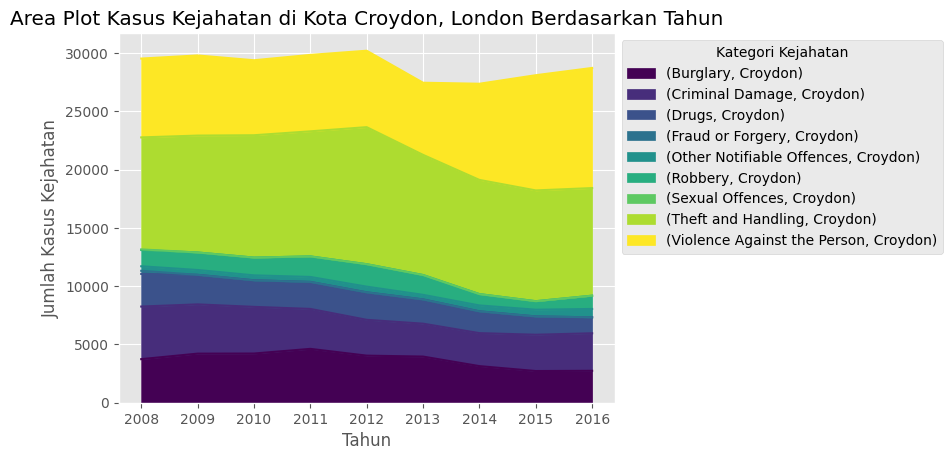

In [9]:
plt.figure(figsize=(15, 8))
pivot_table_croydon.unstack().plot.area(stacked=True, cmap='viridis')

plt.title('Area Plot Kasus Kejahatan di Kota Croydon, London Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus Kejahatan')

plt.legend(title='Kategori Kejahatan', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Insight:**

Secara keseluruhan, jumlah kasus kejahatan di Kota Croydon, London dari tahun ke tahun (2008-2016) mengalami penurunan. Meskipun begitu, terdapat kasus kejahatan yang kembali naik setelah mengalami penurunan. Salah satunya dapat dilihat dari jumlah kasus *Violence Against the Person* yang pada tahun 2013 (setelah kenaikan pada tahun 2012) mengalami penurunan, tetapi kembali meningkat dimulai dari tahun 2014.

## Histogram

**Question:**

Bagaimana distribusi jumlah kasus kejahatan berdasaran bulan pada tahun 2010 di wilayah London?



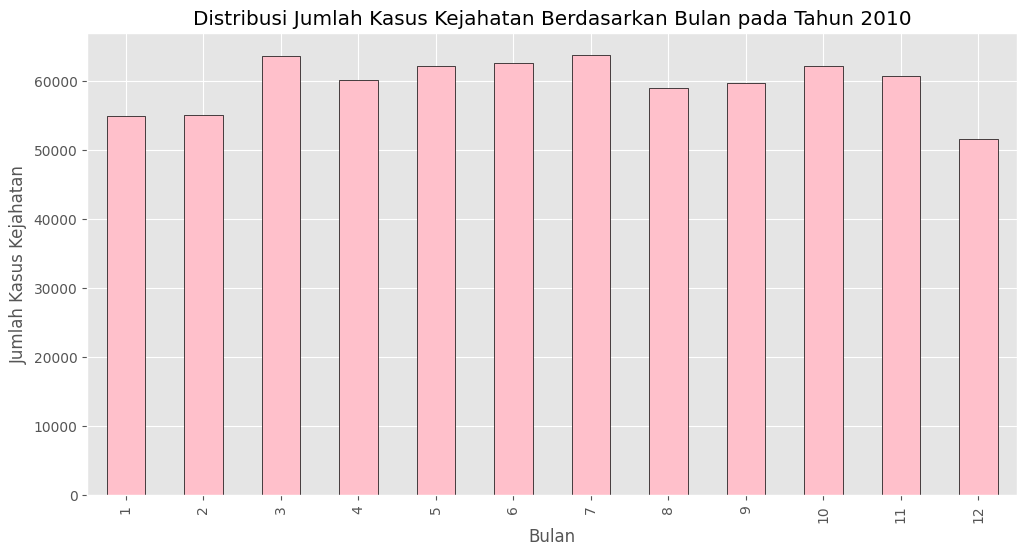

In [10]:
df_2010_his = df[df['year'] == 2010]

plt.figure(figsize=(12, 6))
df_2010_his.groupby('month')['value'].sum().plot(kind='bar', color='pink', edgecolor='black')

plt.title('Distribusi Jumlah Kasus Kejahatan Berdasarkan Bulan pada Tahun 2010')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kasus Kejahatan')

plt.show()


**Insight:**

Berdasarkan visualisasi yang dihasilkan, telah terlihat distribusi penyebaran jumlah kasus kejahatan berdasarkan bulan pada tahun 2010 di Wilayah London. Dapat dilihat bahwa penyebaran dari kasus kejahatan tersebar secara (hampir rata) per bulan. Tidak ada penurunan maupun kenaikan yang signifikan terkait kasus kejahatan di wilayah London, khususnya pada tahun 2010.

## Bar Charts (Dataframe) <a id="10"></a>

**Question:**
Wilayah kota London apa saja yang memiliki kasus kejahatan tertinggi pada Tahun 2008.

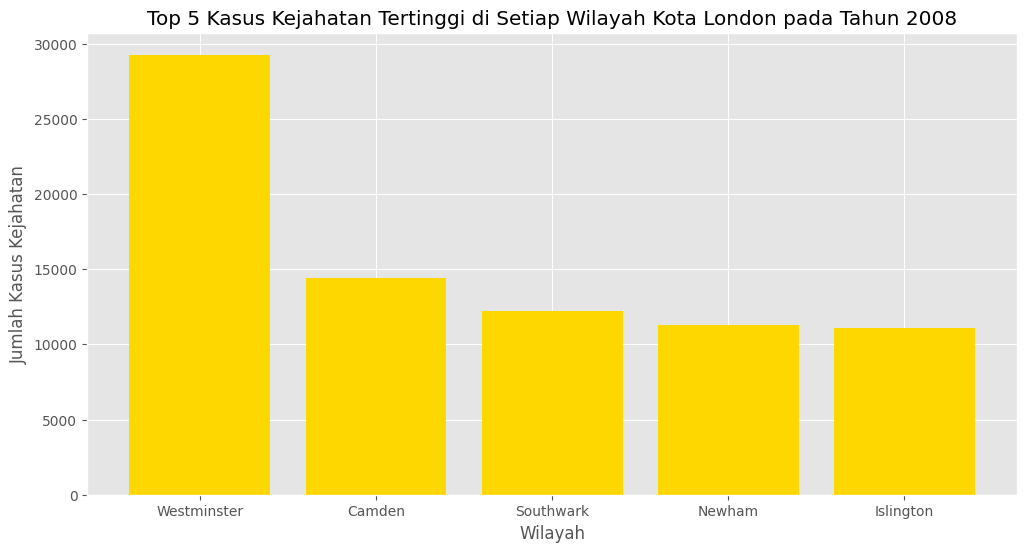

In [11]:
# Write your function below
df_2008 = df[df['year'] == 2008]
grouped_data = df_2008.groupby(['borough', 'major_category'])['value'].sum().reset_index()
top_crimes_2008 = grouped_data.nlargest(5, 'value')

plt.figure(figsize=(12, 6))
plt.bar(top_crimes_2008['borough'], top_crimes_2008['value'], color='gold')

top_crime_category = grouped_data.groupby('borough')['value'].idxmax()
top_crimes_2008 = grouped_data.loc[top_crime_category]

plt.title('Top 5 Kasus Kejahatan Tertinggi di Setiap Wilayah Kota London pada Tahun 2008')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Kasus Kejahatan')

plt.show()

**Insight:**

Melalui visualisasi di atas, dapat dilihat bahwa pada tahun 2008, untuk wilayah Westminster (London) menempati urutan tertinggi wilayah yang mendapati kasus kejahatan tertinggi, yakni 293 kasus. Paling tinggi dari wilayah lainnya dengan gap perbedaan yang cukup tinggi dibanding wilayah lainnya yang rata-rata hampir sama. 

## Pie Charts <a id="6"></a>

**Question:**

Bagaimana persentase Jenis Kasus Kejahatan pada Tahun 2008 di Wilayah Kota London

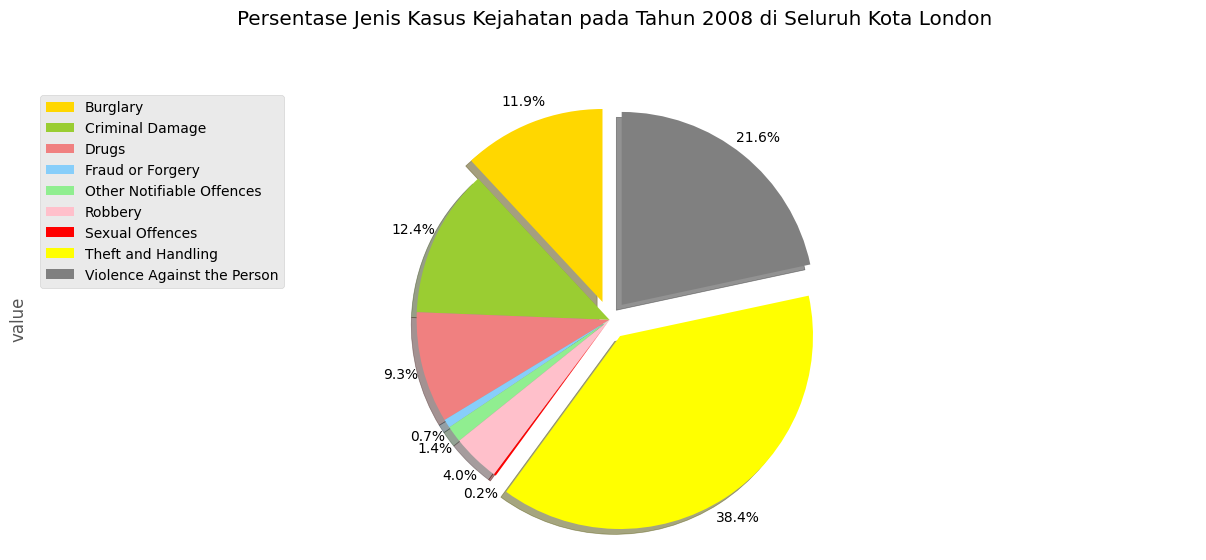

In [12]:
df_2008 = df[df['year'] == 2008]

# Menyusun data berdasarkan kolom jenis kejahatan (misalnya, 'major_category')
data_grup = df_2008.groupby('major_category')['value'].sum().reset_index()

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'red', 'yellow', 'gray']

# Ratio untuk offset setiap wedges
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0.1, 0.1]

# Visualisasi menggunakan pie chart
data_grup.plot(kind='pie',
               y='value',
               figsize=(15, 6),
               autopct='%1.1f%%',
               startangle=90,
               shadow=True,
               colors=colors_list,
               labels=None,
               pctdistance=1.12,
               explode=explode_list
               )


plt.title('Persentase Jenis Kasus Kejahatan pada Tahun 2008 di Seluruh Kota London', y=1.12)

plt.axis('equal')

# Menambahkan legenda
plt.legend(labels=data_grup['major_category'], loc='upper left')

plt.show()


**Insight:**

Berdasarkan visualisasi yang dapat dilihat di atas, terlihat bahwa kasus kejahatan tertinggi yang terjadi pada tahun 2008 di seluruh wilayah kota London adalah *Theft and Handling*, yakni dengan presentase 38.4% atau 283692 kasus. Lalu, diikuti dengan kasus *Violence Againts the Person* diurutan kedua dengan presentase 21.6% atau 159844 kasus.

## Box Plots <a id="8"></a>

**Question:**

Bagaimana persebaran data kasus kejahatan di Westminster dengan jenis kejahatan *Theft and Handling* pada tahun 2010?

<Figure size 1200x600 with 0 Axes>

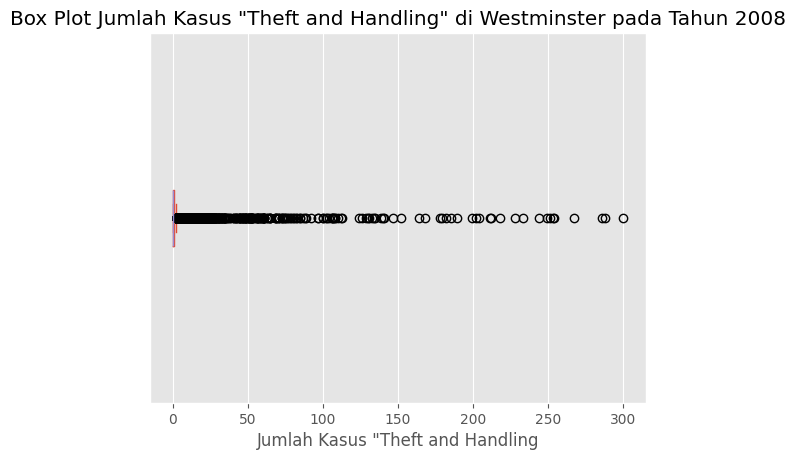

In [13]:
df_theft_westminster_2008 = df[(df['year'] == 2008) & (df['borough'] == 'Westminster') & (df['major_category'] == 'Theft and Handling')]

# Visualisasi menggunakan box plot dengan skala logaritmik pada sumbu x
plt.figure(figsize=(12, 6))
df_theft_westminster_2008[['value']].plot(kind='box', vert=False)

# Menambahkan judul dan label sumbu
plt.title('Box Plot Jumlah Kasus "Theft and Handling" di Westminster pada Tahun 2008')
plt.xlabel('Jumlah Kasus "Theft and Handling')
plt.yticks([])

plt.show()


**Insight:**



## Scatter Plots <a id="10"></a>

**Question:**

Bagaimana penyebaran jumlah kasus kejahatan pada tahun 2010 di Seluruh Wilayah London berdasarkan bulan?

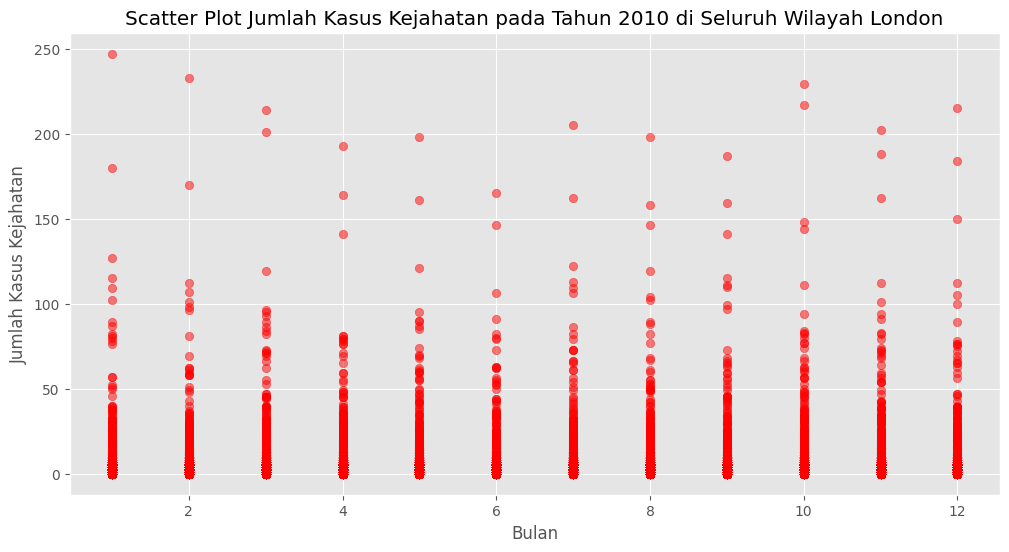

In [14]:
df_2010 = df[df['year'] == 2010]

plt.figure(figsize=(12, 6))
plt.scatter(df_2010['month'], df_2010['value'], color='red', alpha=0.5)

plt.title('Scatter Plot Jumlah Kasus Kejahatan pada Tahun 2010 di Seluruh Wilayah London')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kasus Kejahatan')

plt.show()


## Word Clouds <a id="8"></a>


In [15]:
# !pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

In [16]:
stopwords = set(STOPWORDS)

In [17]:
kotoba = ' '.join(df['borough'])

In [18]:
workcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
workcloud.generate(kotoba)

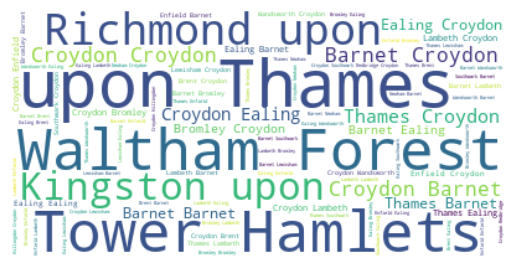

In [19]:
plt.imshow(workcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Folium

In [20]:
# !pip install folium
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [21]:
world_map = folium.Map(location=[51.509865, -0.118092])
world_map